# Project 1


In [2]:
# Code goes here
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [4]:
# Load Social Media Usage Survey data
social_df = pd.read_csv('Resources/smmh.csv')


In [5]:
# Display the first few rows of the DataFrame
print(social_df.head())

            Timestamp  1. What is your age? 2. Gender 3. Relationship Status  \
0  4/18/2022 19:18:47                  21.0      Male      In a relationship   
1  4/18/2022 19:19:28                  21.0    Female                 Single   
2  4/18/2022 19:25:59                  21.0    Female                 Single   
3  4/18/2022 19:29:43                  21.0    Female                 Single   
4  4/18/2022 19:33:31                  21.0    Female                 Single   

  4. Occupation Status 5. What type of organizations are you affiliated with?  \
0   University Student                                         University       
1   University Student                                         University       
2   University Student                                         University       
3   University Student                                         University       
4   University Student                                         University       

  6. Do you use social media?  \

In [6]:
# Inspect the data
print(social_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

In [7]:
new_df = social_df.rename(columns = {
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'organization',
    '6. Do you use social media?': 'is_social_media_user',
    '7. What social media platforms do you commonly use?': 'social_media_platforms',
    '8. What is the average time you spend on social media every day?': 'avg_time_on_social_media',
    '9. How often do you find yourself using Social media without a specific purpose?': 'freq_on_social_media',
    '10. How often do you get distracted by Social media when you are busy doing something?':'freq_distracted',
    '11. Do you feel restless if you haven\'t used Social media in a while?': 'restless_if_not_used',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'distracted',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worried',
    '14. Do you find it difficult to concentrate on things?': 'difficulty_concentrating',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'compare_to_others',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feel_about_comparisons',
    '17. How often do you look to seek validation from features of social media?': 'seek_validation',
    '18. How often do you feel depressed or down?': 'depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'fluctuating_interest',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues'
})
new_df

,Timestamp,age,gender,relationship_status,occupation_status,organization,is_social_media_user,social_media_platforms,avg_time_on_social_media,freq_on_social_media,...,restless_if_not_used,distracted,worried,difficulty_concentrating,compare_to_others,feel_about_comparisons,seek_validation,depressed,fluctuating_interest,sleep_issues
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


In [8]:
# Describe the data
print(social_df.describe())


       1. What is your age?  \
count             481.00000   
mean               26.13659   
std                 9.91511   
min                13.00000   
25%                21.00000   
50%                22.00000   
75%                26.00000   
max                91.00000   

       9. How often do you find yourself using Social media without a specific purpose?  \
count                                         481.000000                                  
mean                                            3.553015                                  
std                                             1.096299                                  
min                                             1.000000                                  
25%                                             3.000000                                  
50%                                             4.000000                                  
75%                                             4.000000                           

In [9]:
# Check for missing values
print(social_df.isnull().sum())

Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

In [10]:
print(new_df.describe())

             age  freq_on_social_media  freq_distracted  restless_if_not_used  \
count  481.00000            481.000000       481.000000            481.000000   
mean    26.13659              3.553015         3.320166              2.588358   
std      9.91511              1.096299         1.328137              1.257059   
min     13.00000              1.000000         1.000000              1.000000   
25%     21.00000              3.000000         2.000000              2.000000   
50%     22.00000              4.000000         3.000000              2.000000   
75%     26.00000              4.000000         4.000000              3.000000   
max     91.00000              5.000000         5.000000              5.000000   

       distracted     worried  difficulty_concentrating  compare_to_others  \
count  481.000000  481.000000                481.000000         481.000000   
mean     3.349272    3.559252                  3.245322           2.831601   
std      1.175552    1.283356       

In [11]:
print(new_df.isnull().sum())

Timestamp                    0
age                          0
gender                       0
relationship_status          0
occupation_status            0
organization                30
is_social_media_user         0
social_media_platforms       0
avg_time_on_social_media     0
freq_on_social_media         0
freq_distracted              0
restless_if_not_used         0
distracted                   0
worried                      0
difficulty_concentrating     0
compare_to_others            0
feel_about_comparisons       0
seek_validation              0
depressed                    0
fluctuating_interest         0
sleep_issues                 0
dtype: int64


In [12]:
# Filter data for analysis (example: teenagers vs. adults)
teenagers = social_df[social_df['1. What is your age?'].between(12, 19)]
adults = social_df[social_df['1. What is your age?'] > 19]

c:\Users\rando\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


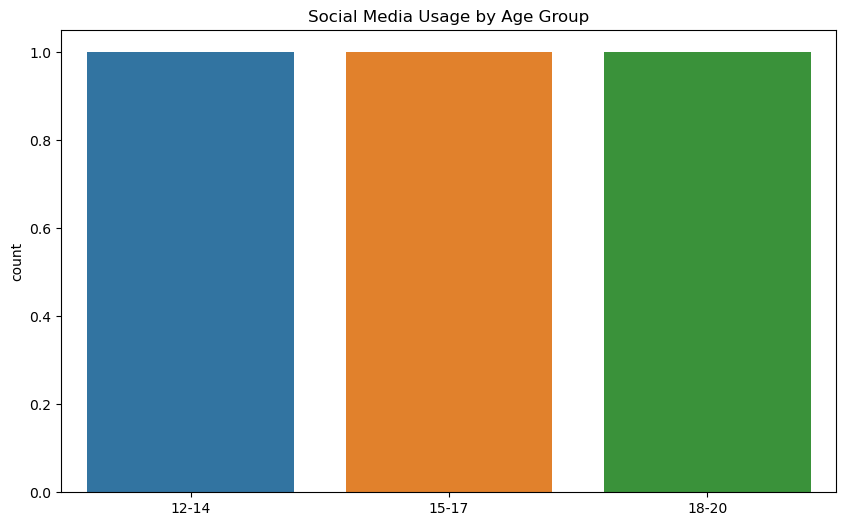

In [13]:
# Example visualization: Social media usage by age group
age_order = ['12-14' , '15-17' , '18-20']
plt.figure(figsize=(10, 6))
sns.countplot(data=social_df, x=age_order) 
plt.title("Social Media Usage by Age Group")
plt.show()


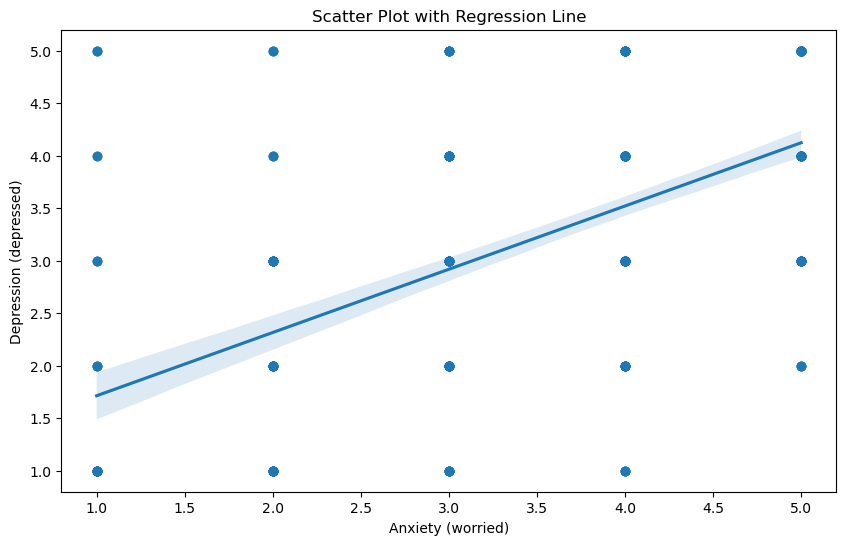

In [14]:
# Example correlation analysis for anxiety and depression

correlation = new_df[['worried', 'depressed']].corr()

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='worried', y='depressed', data=new_df)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Anxiety (worried)')
plt.ylabel('Depression (depressed)')
plt.show()

In [15]:
#### 7. *Is there a correlation between the number of social media platforms used and the hours spent on social media?*

def count_platforms(platforms):
    if pd.isna(platforms): 
        return 0
    return len(platforms.split(','))
new_df['num_platforms'] = new_df['social_media_platforms'].apply(count_platforms)
print(new_df.head())



            Timestamp   age  gender relationship_status   occupation_status  \
0  4/18/2022 19:18:47  21.0    Male   In a relationship  University Student   
1  4/18/2022 19:19:28  21.0  Female              Single  University Student   
2  4/18/2022 19:25:59  21.0  Female              Single  University Student   
3  4/18/2022 19:29:43  21.0  Female              Single  University Student   
4  4/18/2022 19:33:31  21.0  Female              Single  University Student   

  organization is_social_media_user  \
0   University                  Yes   
1   University                  Yes   
2   University                  Yes   
3   University                  Yes   
4   University                  Yes   

                              social_media_platforms avg_time_on_social_media  \
0  Facebook, Twitter, Instagram, YouTube, Discord...    Between 2 and 3 hours   
1  Facebook, Twitter, Instagram, YouTube, Discord...        More than 5 hours   
2            Facebook, Instagram, YouTube, Pint

In [16]:
def extract_time_str(time_str):
    if pd.isna(time_str): 
        return "0 hours"
    return time_str.strip()
new_df['avg_time_on_social_media_str'] = new_df['avg_time_on_social_media'].apply(extract_time_str)
grouped_data = new_df.groupby('num_platforms')['avg_time_on_social_media_str'].agg(lambda x: x.value_counts().index[0])
grouped_data = grouped_data.reset_index()
print(grouped_data)

   num_platforms avg_time_on_social_media_str
0              1        Between 1 and 2 hours
1              2        Between 1 and 2 hours
2              3            More than 5 hours
3              4        Between 3 and 4 hours
4              5        Between 2 and 3 hours
5              6            More than 5 hours
6              7            More than 5 hours
7              8        Between 3 and 4 hours
8              9        Between 3 and 4 hours


In [30]:
grouped_data['num_platforms'] = grouped_data['num_platforms'].replace({
    1: 'Facebook',
    2: 'Twitter',
    3: 'Reddit',
    4: 'YouTube',
    5: 'Instagram',
    6: 'Discord'
})
print(grouped_data.head())

  num_platforms  avg_time_on_social_media_hours  platform
0      Facebook                        3.065789   Twitter
1       Twitter                        2.440678  Facebook
2        Reddit                        3.398734    Reddit
3       YouTube                        3.582524   YouTube
4     Instagram                        3.889610   Discord


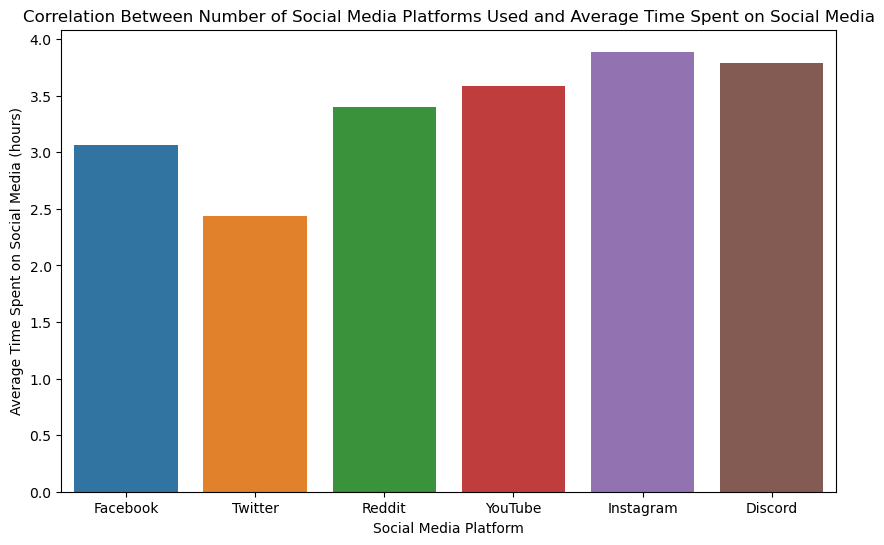

In [33]:
# Is there a correlation between the number of social media platforms used and the hours spent on social media?
new_df['age'] = new_df['age'].fillna(new_df['age'].mean())
new_df['gender'] = new_df['gender'].fillna('Not Specified')
def extract_time_in_hours(time_str):
    if pd.isna(time_str):
        return 0
    time_str = time_str.strip().lower()
    if "more than" in time_str:
        return 6  
    elif "between" in time_str:
        parts = time_str.split('and')
        return (int(parts[0].strip().split()[1]) + int(parts[1].strip().split()[0])) / 2
    elif "less than" in time_str:
        return 0.5 
    elif "hour" in time_str:
        return int(time_str.split()[0])
    return 0
new_df['avg_time_on_social_media_hours'] = new_df['avg_time_on_social_media'].apply(extract_time_in_hours)
new_df['num_platforms'] = new_df['social_media_platforms'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)
grouped_data = new_df.groupby('num_platforms')['avg_time_on_social_media_hours'].mean().reset_index()
platform_mapping = {
    1: 'Facebook',
    2: 'Twitter',
    3: 'Reddit',
    4: 'YouTube',
    5: 'Instagram',
    6: 'Discord'
}
grouped_data['platform'] = grouped_data['num_platforms'].map(platform_mapping)
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='avg_time_on_social_media_hours', data=grouped_data)
plt.xlabel('Social Media Platform')
plt.ylabel('Average Time Spent on Social Media (hours)')
plt.title('Correlation Between Number of Social Media Platforms Used and Average Time Spent on Social Media')
plt.show()
                                                                 

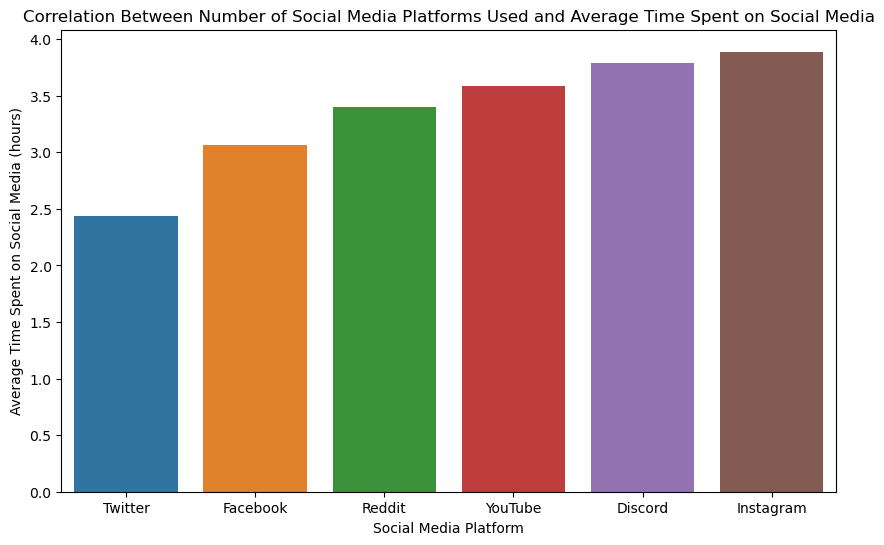

In [36]:
new_df['avg_time_on_social_media_hours'] = new_df['avg_time_on_social_media'].apply(extract_time_in_hours)
new_df['num_platforms'] = new_df['social_media_platforms'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)
grouped_data = new_df.groupby('num_platforms')['avg_time_on_social_media_hours'].mean().reset_index()
platform_mapping = {
    1: 'Facebook',
    2: 'Twitter',
    3: 'Reddit',
    4: 'YouTube',
    5: 'Instagram',
    6: 'Discord'
}
grouped_data['platform'] = grouped_data['num_platforms'].map(platform_mapping)
grouped_data = grouped_data.sort_values(by='avg_time_on_social_media_hours')
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='avg_time_on_social_media_hours', data=grouped_data)
plt.xlabel('Social Media Platform')
plt.ylabel('Average Time Spent on Social Media (hours)')
plt.title('Correlation Between Number of Social Media Platforms Used and Average Time Spent on Social Media')
plt.show()


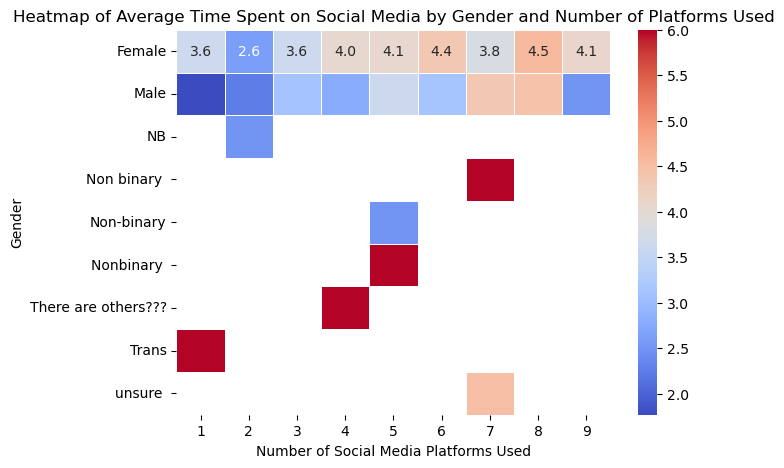

In [38]:
pivot_data = new_df.pivot_table(values='avg_time_on_social_media_hours', index='gender', columns='num_platforms', aggfunc='mean')
plt.figure(figsize=(7, 5))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Heatmap of Average Time Spent on Social Media by Gender and Number of Platforms Used')
plt.xlabel('Number of Social Media Platforms Used')
plt.ylabel('Gender')
plt.show()

In [19]:

print(grouped_data.describe())


       num_platforms  avg_time_on_social_media_hours
count       9.000000                        9.000000
mean        5.000000                        3.581553
std         2.738613                        0.614196
min         1.000000                        2.440678
25%         3.000000                        3.363636
50%         5.000000                        3.582524
75%         7.000000                        3.889610
max         9.000000                        4.500000


In [20]:
print(grouped_data.isnull().sum())

num_platforms                     0
avg_time_on_social_media_hours    0
platform                          3
dtype: int64
